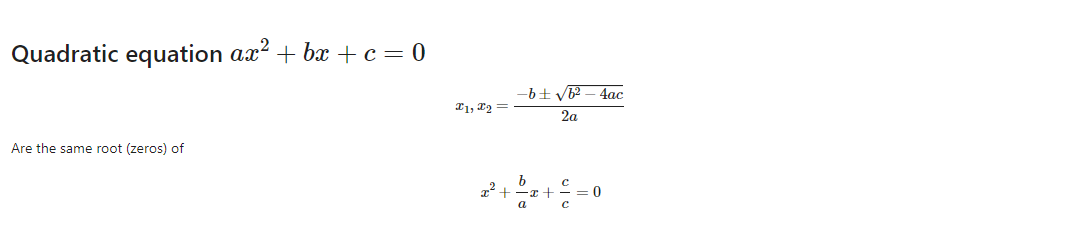

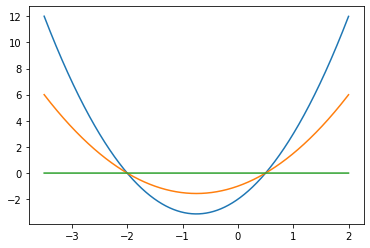

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def quadratic(a,b,c,x):
    return a*x**2+b*x+c

def quadraticeqiv(a,b,c,x):
    return x**2+(b/a)*x+(c/a)

# (2x-1) (x+2) = 2x**2 +3x -2 =0;  x_1 = 1/2, x_2 =-2
# Equivalent x**2 +3/2x -1 = 0 

x = np.arange(-3.5, 2, 0.001)
z = np.zeros(len(x))
y = quadratic(2,3,-2,x)
ynew = quadraticeqiv(2,3,-2,x)
plt.plot(x, y, x, ynew, x,z)
plt.show()

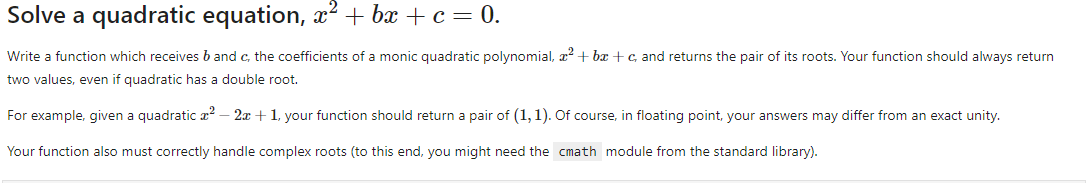

In [2]:
import math
def solve_quad(b, c):
    """Solve a quadratic equation, x**2 + bx + c = 0.
    
    Parameters
    ----------
    b, c : float
       Coefficients
       
    Returns
    -------
    x1, x2 : float or complex
       Roots.  """
    
    # ... enter your code here ...
  
    discriminante = ((b**2)-(4*c))
    if discriminante == b**2:
      x1 = -b
      x2 = c/x1
    elif discriminante < 0:
      x1 = complex((-b/2), (math.sqrt(abs(discriminante))/2))
      x2 = complex((-b/2), (-math.sqrt(abs(discriminante))/2))
    else:
      x1 = (-b + (math.sqrt(discriminante)))/2
      x2 = (-b - (math.sqrt(discriminante)))/2
      
    return x1, x2

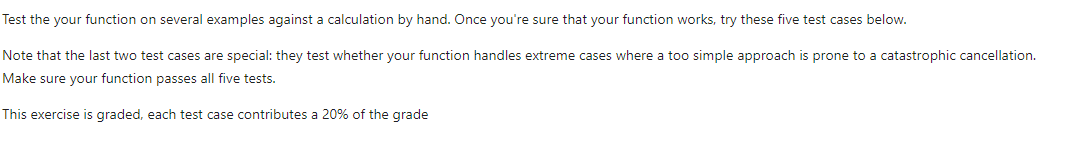

In [3]:
from numpy import allclose
variants = [{'b': 4.0, 'c': 3.0},
            {'b': 2.0, 'c': 1.0},
            {'b': 0.5, 'c': 4.0},
            {'b': 1e10, 'c': 3.0},
            {'b': -1e10, 'c': 4.0},]
for var in variants:
    x1, x2 = solve_quad(**var)
    print(allclose(x1*x2, var['c']))

True
True
True
True
True


In [4]:
for var in variants:
    x1, x2 = solve_quad(**var)
    print("solve_quad("+str(var['b'])+","+str(var['c'])+")",solve_quad(**var) )

solve_quad(4.0,3.0) (-1.0, -3.0)
solve_quad(2.0,1.0) (-1.0, -1.0)
solve_quad(0.5,4.0) ((-0.25+1.984313483298443j), (-0.25-1.984313483298443j))
solve_quad(10000000000.0,3.0) (-10000000000.0, -3e-10)
solve_quad(-10000000000.0,4.0) (10000000000.0, 4e-10)


**Analytic solutions with sympy solveset.**

In [5]:
from sympy import Symbol, solveset, Eq, Rational
x = Symbol('x')
solveset(Eq(x**2 + 4*x + 3, 0), x)

FiniteSet(-3, -1)

In [6]:
solveset(Eq(x**2 + 2*x + 1, 0), x)

FiniteSet(-1)

In [7]:
solveset(Eq(x**2 + Rational(1,2)*x + 1, 0), x)

FiniteSet(-1/4 - sqrt(15)*I/4, -1/4 + sqrt(15)*I/4)

In [8]:
solveset(Eq(x**2 + 10000000000*x + 3, 0), x)

FiniteSet(-5000000000 + sqrt(24999999999999999997), -5000000000 - sqrt(24999999999999999997))

In [9]:
solveset(Eq(x**2 - 10000000000*x + 4, 0), x)

FiniteSet(5000000000 - 2*sqrt(6249999999999999999), 5000000000 + 2*sqrt(6249999999999999999))

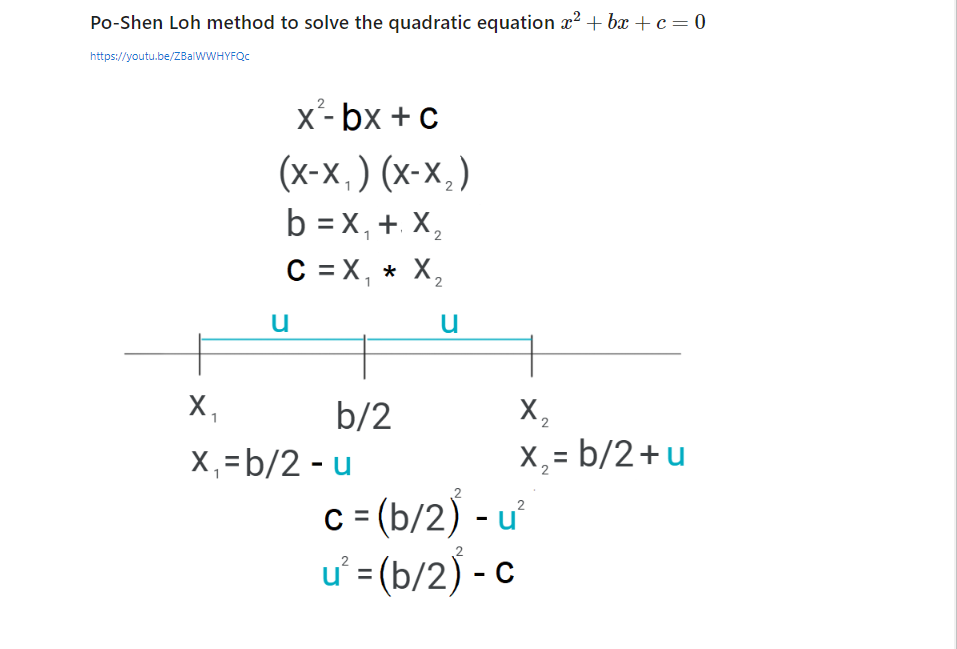

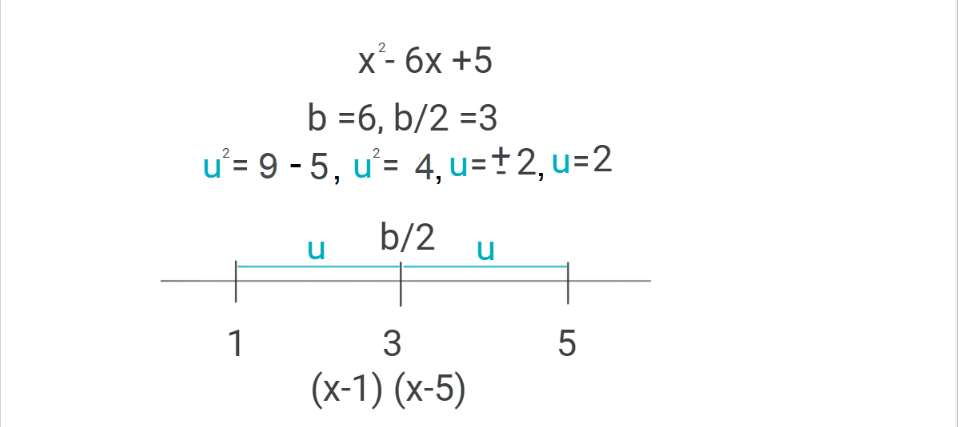

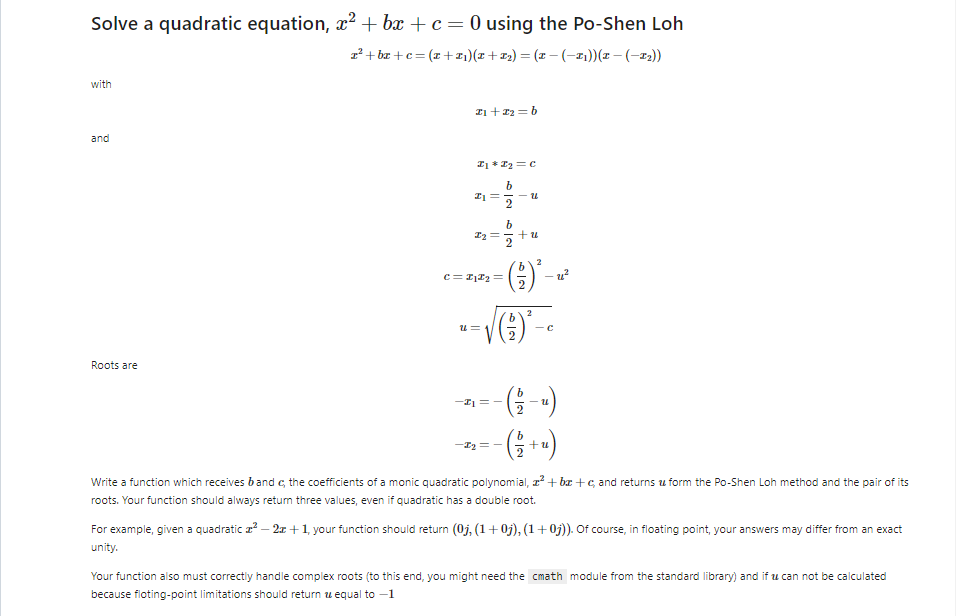

In [10]:
import cmath

def solve_quad_Po_Shen_Loh(b, c):

   """Solve a quadratic equation, x**2 + bx + c = 0.
    
    Parameters
    ----------
    b, c : float
       Coefficients
       
    Returns
    -------
    u : The distance from b/2 to x and x2  and -1  if floting-point limitations
    x1, x2 : float or complex roots.  """
    
   # ... enter your code here ...
   discriminante = ((b/2)**2-c)
   proof = (b/2)**2
   if (discriminante == proof):
       u=-1
       x1 = -b
       x2 = c/x1
       
   else:
      u = cmath.sqrt(discriminante)
      x1 = -((b/2)-u)
      x2 = -((b/2)+u)
   
  
   return u,x1,x2

Test the your function on several examples against a calculation by hand. Once you're sure that your function works, try these five test cases below.

Note that the last two test cases are special: they test whether your function handles extreme cases where a too simple approach is prone to a catastrophic cancellation. Make sure your function passes all five tests.

This exercise is graded, each test case contributes a 20% of the grade.

In [11]:
from numpy import allclose
variants = [{'b': 4.0, 'c': 3.0},
            {'b': 2.0, 'c': 1.0},
            {'b': 0.5, 'c': 4.0},
            {'b': 1e10, 'c': 3.0},
            {'b': -1e10, 'c': 4.0},]
for var in variants:
    u, x1, x2 = solve_quad_Po_Shen_Loh(**var)
    print(allclose(x1*x2, var['c']))

True
True
True
True
True


In [12]:
for var in variants:
    u, x1, x2 = solve_quad_Po_Shen_Loh(**var)
    print("solve_quad_Po_Shen_Loh("+str(var['b'])+","+str(var['c'])+")",solve_quad_Po_Shen_Loh(**var) )

solve_quad_Po_Shen_Loh(4.0,3.0) ((1+0j), (-1-0j), (-3-0j))
solve_quad_Po_Shen_Loh(2.0,1.0) (0j, (-1-0j), (-1-0j))
solve_quad_Po_Shen_Loh(0.5,4.0) (1.984313483298443j, (-0.25+1.984313483298443j), (-0.25-1.984313483298443j))
solve_quad_Po_Shen_Loh(10000000000.0,3.0) (-1, -10000000000.0, -3e-10)
solve_quad_Po_Shen_Loh(-10000000000.0,4.0) (-1, 10000000000.0, 4e-10)
